<IPython.core.display.Javascript object>


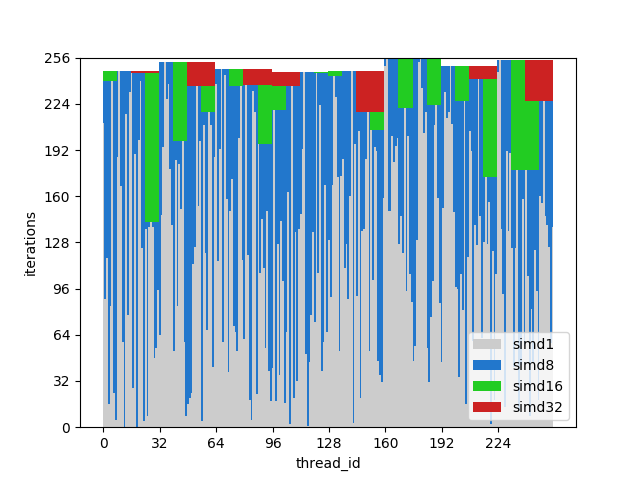

In [61]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import random
%matplotlib notebook
N = 256
def plotThreads(threads):
    x = np.ndarray([N, 1])
    for i in range(0, N):
        x[i] = i

    def getMax(M):
        out = np.ndarray([N,1])
        for i in range(0, math.floor(N/M)):
            maxM = max(threads[(i * M):((i+1)*M)])
            for j in range(0, M):
                out[i * M + j] = maxM
        return out

    threads_simd8 = getMax(8)
    threads_simd16 = getMax(16)
    threads_simd32 = getMax(32)

    def drawOnTop(that, ontop, color):
        y = np.ndarray([N, 1])
        for i in range(0, N):
            y[i] = that[i] - ontop[i]
        bar = plt.bar(x, y, 1.0, bottom=ontop, linewidth=1, color=color)
        return bar
    plt.figure()
    bar_simd1 = plt.bar(x, threads, 1.0, linewidth=1, color='#cccccc')
    bar_simd8 = drawOnTop(threads_simd8, threads, '#2277cc')
    bar_simd16 = drawOnTop(threads_simd16, threads_simd8, '#22cc22')
    bar_simd32 = drawOnTop(threads_simd32, threads_simd16, '#cc2222')
    #plt.bar(x, threads_simd8, 1.0, bottom=threads, linewidth=1, color='#2222cc')
    #plt.bar(x, threads_simd16, 1.0, bottom=threads_simd8, linewidth=1, color='#22cc22')
    #plt.bar(x, threads_simd32, 1.0, bottom=threads_simd16, linewidth=1, color='#cc2222')
    plt.ylabel('iterations')
    plt.xlabel('thread_id')
    plt.legend((bar_simd1, bar_simd8, bar_simd16, bar_simd32), ("simd1", "simd8", "simd16", "simd32"))
    plt.xticks(np.arange(0, N, 32))
    plt.yticks(np.arange(0, N + 4, 32))
    plt.show()
threads = np.ndarray([N,1])
for i in range(0, N):
    threads[i] = math.floor(random.random() * N)
plotThreads(threads)


<IPython.core.display.Javascript object>


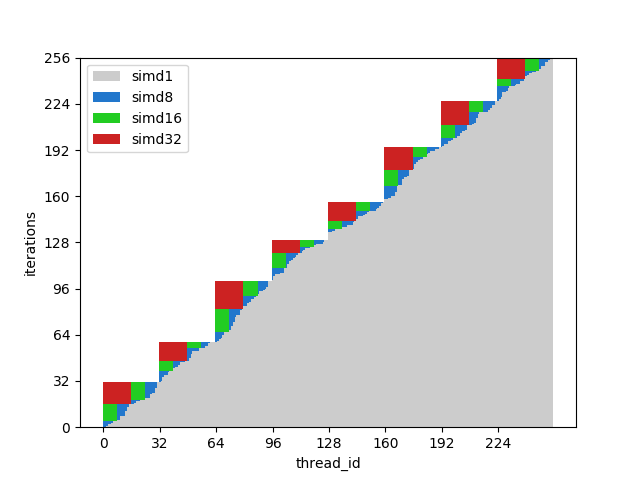

In [62]:
plotThreads(sorted(threads))